CODE ĐƯỢC DỊCH TRONG SÁCH

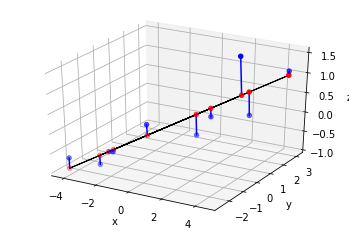

In [ ]:
import numpy as np
X = np.genfromtxt('pcadat.csv', delimiter=',')
n = X.shape[0]
X = X - X.mean(axis=0)
G = X.T @ X
U, _ , _ = np.linalg.svd(G/n)
# Điem du kien
Y = X @ np.outer(U[:,0],U[:,0])
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.w_xaxis.set_pane_color((0, 0, 0, 0))
ax.plot(Y[:,0], Y[:,1], Y[:,2], c='k', linewidth=1)
ax.scatter(X[:,0], X[:,1], X[:,2], c='b')
ax.scatter(Y[:,0], Y[:,1], Y[:,2], c='r')
for i in range(n):
  ax.plot([X[i,0], Y[i,0]], [X[i,1],Y[i,1]], [X[i,2],Y[i,2]], 'b')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

U = 
 [[-0.3614 -0.6566  0.582   0.3155]
 [ 0.0845 -0.7302 -0.5979 -0.3197]
 [-0.8567  0.1734 -0.0762 -0.4798]
 [-0.3583  0.0755 -0.5458  0.7537]]

 diag(D^2) =  [4.2001 0.2411 0.0777 0.0237]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


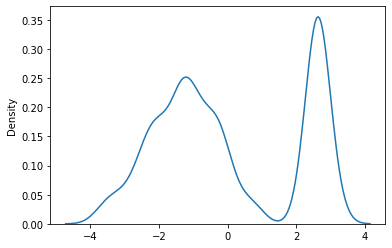

In [ ]:
import seaborn as sns, numpy as np
import scipy.linalg
np.set_printoptions(precision=4)
X = np.genfromtxt('IrisX.csv',delimiter=',')
n = X.shape[0]
X = X - np.mean(X, axis=0)
[U,D2,UT]= np.linalg.svd((X.T @ X)/n)
print('U = \n', U)
print('\n diag(D^2) = ', D2)
z = U[:,0].T @ X.T
sns.kdeplot(z, bw=0.15)

CODE ĐƯỢC BỔ SUNG

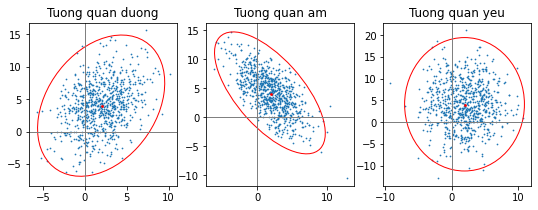

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    if x.size != y.size:
        raise ValueError("x va y phai cung kich thuoc")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])

    # Su dung mot truong hop dac biet de co duoc eigenvalues
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Tinh sai lech do lech cua x tu x
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # Tinh sai lech do lech cua y tu y
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # Tra ve x va y cua bo du lieu tuong quan moi
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]

np.random.seed(0)

PARAMETERS = {
    'Tuong quan duong': [[0.85, 0.35],
                             [0.15, -0.65]],
    'Tuong quan am': [[0.9, -0.4],
                             [0.1, -0.6]],
    'Tuong quan yeu': [[1, 0],
                         [0, 1]],
}

mu = 2, 4
scale = 3, 5

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
for ax, (title, dependency) in zip(axs, PARAMETERS.items()):
    x, y = get_correlated_dataset(800, dependency, mu, scale)
    ax.scatter(x, y, s=0.5)

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax, edgecolor='red')

    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

Tế bào dưới đây sẽ cho phép bạn xem dữ liệu như một hình 3d. Xoay dữ liệu xung quanh và phóng to và sử dụng các bộ điều khiển ở trên cùng bên phải của con số. 

In [ ]:
surfboard = pd.read_csv("data3d.csv")
surfboard.head(5)

,x,y,z
0,0.005605,2.298191,1.746604
1,-1.093255,2.457522,0.170309
2,0.060946,0.473669,-0.003543
3,-1.761945,2.151108,3.132426
4,1.950637,-0.194469,-2.101949


In [ ]:
fig = px.scatter_3d(surfboard, x='x', y='y', z='z', range_x = [-10, 10],range_y = [-10, 10],range_z = [-10, 10])
fig.show()

Tìm hiểu những gì PCA sẽ làm khi áp dụng cho dữ liệu này. Để thực hiện đúng pca, trước tiên chúng ta cần "center” dữ liệu để có nghĩa là 0.

Tính giá trị trung bình các cột của surfboard, và lưu kết quả trong surfboard_mean, chọn surfboard_mean làm một mảng numpy hoặc một chuỗi nào đó. Bất kể loại dữ liệu nào, surfboard_mean phải có 3 nghĩa, 1 cho mỗi thuộc tính, với tọa độ x trước, sau đó y, sau đó z. 

In [ ]:
surfboard_mean = np.mean(surfboard, axis = 0)
surfboard_centered = surfboard - surfboard_mean

PCA là một ứng dụng cụ thể của giá trị số ít phân hủy cho các ma trận. Nếu chúng ta có ma trận dữ liệu X, chúng ta có thể phân hủy nó thành U, ∑, V^T để 
$$X = U\sum\ {V^T}$$



In [ ]:
u, s, vt = np.linalg.svd(surfboard_centered, full_matrices = False)
u, s, vt

(array([[-0.0255, -0.0211, -0.0341],
        [-0.021 , -0.0259,  0.0543],
        [-0.0028, -0.0081,  0.002 ],
        ...,
        [ 0.0154, -0.0048,  0.0567],
        [-0.0092,  0.0346,  0.0349],
        [-0.017 ,  0.0274, -0.0197]]),
 array([103.7685,  40.3836,  21.0476]),
 array([[ 0.3854, -0.6727, -0.6316],
        [-0.5457, -0.7181,  0.4318],
        [-0.7441,  0.1783, -0.6439]]))

Xem xét mối quan hệ giữa các giá trị số ít và phương sai dữ liệu. Tổng phương sai là tổng của các cột dữ liệu. 

 Tính toán phương sai cho mỗi cột của dữ liệu

In [ ]:
np.var(surfboard, axis=0)

x    2.330704
y    5.727527
z    4.783513
dtype: float64

Tổng phương sai của tập dữ liệu được cung cấp bởi tổng số các số này. 

---



In [ ]:
total_variance_computed_from_data = sum(np.var(surfboard, axis=0))
total_variance_computed_from_data

12.841743509780109

Tổng phương sai của dữ liệu cũng bằng tổng các giá trị số ít được chia cho số điểm dữ liệu.

$$Var(X) = {{\sum\limits_{i = 1}^d {{\sigma _i}^2} } \over N}$$

trong đó  $${{\sigma _i}}$$
 là giá trị số ít tương ứng với thành phần chính thứ i,  N là tổng số điểm dữ liệu, và Var(X) là độ sai lệch của dữ liệu. 

Tính tổng phương sai sử dụng công thức ở trên và lưu kết quả trong biến total_variance_computed_from_singular_values. 

In [ ]:
total_variance_computed_from_singular_values = np.sum(s**2)/surfboard.shape[0]
total_variance_computed_from_singular_values

12.841743509780104

Đặt variance_explained_by_1st_pc vào tỷ lệ tổng phương sai của tổng số chênh lệch của thành phần chính thì sẽ ra kết quả là một số giữa 0 và 1. 

In [ ]:
variance_explained_by_1st_pc = (s[0]**2/surfboard.shape[0])/total_variance_computed_from_data
variance_explained_by_1st_pc

0.8385084140449129

Tạo ra một biểu đồ cho thấy tỷ lệ phương sai được giải thích bởi tất cả các thành phần chính. Phương sai được giải thích bởi thành phần chủ yếu đầu tiên khớp với giá trị mà chúng ta đã tính ở trên cho variance_explained_by_1st_pc. 

Text(0.5, 1.0, 'Ty le chenh lech cua tung thanh phan chinh')

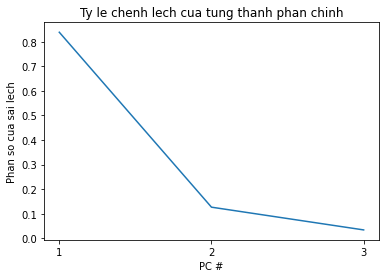

In [ ]:
plt.plot([1, 2, 3], s**2 / sum(s**2));
plt.xticks([1, 2, 3], [1, 2, 3]);
plt.xlabel('PC #');
plt.ylabel('Phan so cua sai lech');
plt.title('Ty le chenh lech cua tung thanh phan chinh')